In [1]:
import numpy as np
from sklearn.datasets import make_blobs,make_circles,make_classification
import matplotlib.pyplot as plt

In [4]:
# X,y = make_blobs(500,2,centers=2)
X,y = make_classification(1000,2,n_informative=2,n_redundant=0,random_state=42)

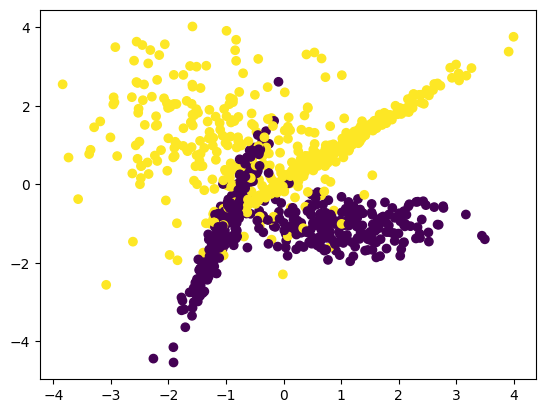

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
class NN:
    def __init__(self,input_dim = 2,hidden_layers = None,output_dim=1):
        self.weights = []
        self.bias = []

        self.weights.append(np.random.normal(0,scale = np.sqrt(6/(input_dim+hidden_layers[0])), size=(input_dim,hidden_layers[0])))
        
        for i in range(1,len(hidden_layers)):
            self.weights.append(np.random.normal(0, scale = np.sqrt(6/(hidden_layers[i-1]+hidden_layers[i])), size=(hidden_layers[i-1],hidden_layers[i])))
            
        self.weights.append(np.random.normal(0,scale = np.sqrt(6/(output_dim+hidden_layers[-1])),size=(hidden_layers[-1],output_dim)))

        for i in range(len(hidden_layers)):
            self.bias.append(np.random.randn(hidden_layers[i]))

        self.bias.append(np.random.randn(output_dim))

    
    def activation(self,Z):
        return 1/(1+np.exp(-Z))
    
    def forwardProp(self,X):
        self.actvs = [X]

        for i in range(len(self.weights)):
            z = self.actvs[-1]@self.weights[i]+self.bias[i]
            self.actvs.append(self.activation(z))

        return self.actvs[-1]

    def loss(self,y,ypred):
        return -np.sum(y*np.log2(ypred)+(1-y)*np.log2(1-ypred))

    def derA(self,a):
        return a*(1-a)
        
    def backProp(self,X,y,lr=0.001,epochs=100):
        for e in range(epochs):
            ypred = self.forwardProp(X)
            delta = [ypred-y]
            grad = [self.actvs[-2].T@delta[-1]]

            for i in range(len(self.weights)-2,-1,-1):
                delta.append((delta[-1]@self.weights[i+1].T)*self.derA(self.actvs[i+1]))
                grad.append(self.actvs[i].T@delta[-1])

            wn = len(self.weights)-1
            for i in range(len(self.weights)):
                self.weights[i] = self.weights[i] - lr*grad[wn]
                self.bias[i] = self.bias[i] - lr*np.sum(delta[wn],axis = 0)
                wn -= 1

    def predict(self,X):
        ypred = self.forwardProp(X).reshape(-1)
        ypred[ypred < 0.5] = 0
        ypred[ypred >= 0.5] = 1
        return ypred

In [18]:
clf = NN(2,[4,2,3],1)

In [19]:
clf.weights

[array([[ 1.3483108 ,  0.69862278, -1.03200645, -2.42090056],
        [ 0.38515996,  3.09603639, -1.00643209,  0.90102221]]),
 array([[-0.78145453,  1.72303852],
        [ 0.49098648, -1.56923314],
        [-2.80321844, -0.99154244],
        [ 0.31019965,  0.12473429]]),
 array([[0.5481922 , 1.37242373, 0.7268577 ],
        [0.08754926, 0.27185718, 0.27371174]]),
 array([[-1.23194285],
        [ 1.18456649],
        [ 0.267739  ]])]

In [20]:
clf.bias

[array([-0.2438626 ,  1.99369903,  0.43495235,  0.68149359]),
 array([ 1.78010862, -0.36059958]),
 array([ 0.03107377,  2.19071645, -1.68223412]),
 array([-1.01357981])]

In [17]:
clf.forwardProp([[1,2],[4,3]])

array([[0.5215679 ],
       [0.52160768]])

In [16]:
clf.actvs

[[[1, 2], [4, 3]],
 array([[9.99151887e-01, 9.60100195e-01, 1.47995912e-02, 1.37258205e-01],
        [9.99996160e-01, 9.98339791e-01, 6.04460548e-04, 4.67655861e-02]]),
 array([[0.96962741, 0.89364502],
        [0.97457571, 0.8945615 ]]),
 array([[0.86388805, 0.83362386, 0.94021205],
        [0.86414309, 0.83410573, 0.94031548]]),
 array([[0.5215679 ],
        [0.52160768]])]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [29]:
clf = NN(x_train.shape[1],[4,2,3],1)
clf.backProp(x_train,y_train.reshape((-1,1)),lr=0.001,epochs=1000)

In [30]:
clf.weights

[array([[ 0.61850899, -0.14126202,  1.03331587,  1.06539686],
        [-0.47822316,  1.21627695,  1.84631379, -1.47983956]]),
 array([[-0.13566715, -0.81229085],
        [ 1.58543282, -0.40970717],
        [ 2.42711297,  1.76191639],
        [-3.23534839, -0.51791148]]),
 array([[-3.55343668, -3.94166517,  1.65516983],
        [-1.74982343, -0.03689223, -0.00442797]]),
 array([[-4.23711068],
        [-4.41365854],
        [ 2.41682439]])]

In [31]:
clf.bias

[array([-0.357343  , -0.18342247, -1.10281974, -1.72846773]),
 array([-0.78812739, -1.49526829]),
 array([1.6464786 , 1.50846916, 0.16754107]),
 array([2.02944213])]

In [34]:
np.mean(y_train == clf.predict(x_train))

0.86875